# DATA MINING MINI PROJECT
## FOOD DEMAND FORECASTING
### RUSANYA T.    - [ 2019/E/115 ]


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries and load the datasets
import pandas as pd
train_df1= pd.read_csv('train.csv')
test_df2= pd.read_csv('test.csv')
meal_df3= pd.read_csv('meal_info.csv')
fc_df4= pd.read_csv('fulfilment_center_info.csv')

In [3]:
# head of fulfilment_center_info file
fc_df4.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [4]:
print("Shape of fulfilment_center_info :", fc_df4.shape)

Shape of fulfilment_center_info : (77, 5)


In [5]:
# NaN values in fulfilment_center_info
fc_df4.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [6]:
# head of meal_info file
meal_df3.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [7]:
print("Shape of meal_info: ", meal_df3.shape)

Shape of meal_info:  (51, 3)


In [8]:
# NaN values in meal_info
meal_df3.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [9]:
# Head of Train file (historical demand data)
train_df1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [10]:
print("Shape of train: ", train_df1.shape)

Shape of train:  (456548, 9)


In [11]:
# NaN values in train data
train_df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [12]:
test_df2['num_orders']=123456 ### Assigning random number for Target Variable of Test Data.

In [13]:
# Head of Test data
test_df2.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0      123456  
1                      0                  0      123456  
2                      0                  0      123456  
3                      0                  0      123456  
4                      0                  0      123456

In [14]:
print("Shape of Test: ", test_df2.shape)

Shape of Test:  (32573, 9)


In [15]:
# NaN values in test data
test_df2.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

## FULFILMENT CENTER INFO

In [16]:
print("* Total number of centers : ", fc_df4['center_id'].nunique())


* Total number of centers :  77


In [17]:
print("* Types of centers :")
print(fc_df4['center_type'].unique())

* Types of centers :
['TYPE_A' 'TYPE_B' 'TYPE_C']


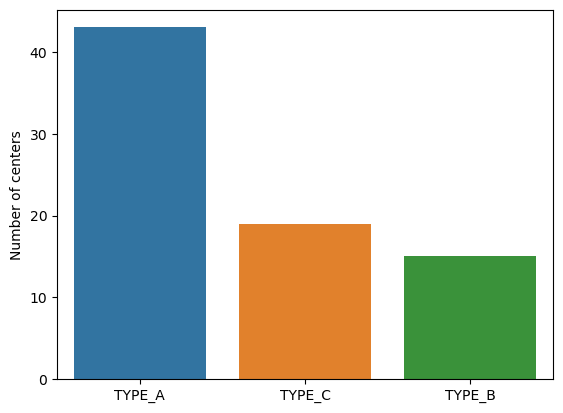

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use value_counts to get counts of each category
center_type_counts = fc_df4['center_type'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=center_type_counts.index, y=center_type_counts)
ax.set(ylabel='Number of centers')
plt.show()


In [19]:
print("Total Number of cities: ", fc_df4['city_code'].nunique())

Total Number of cities:  51


In [20]:
print("Total number of regions: ", fc_df4['region_code'].nunique())

Total number of regions:  8


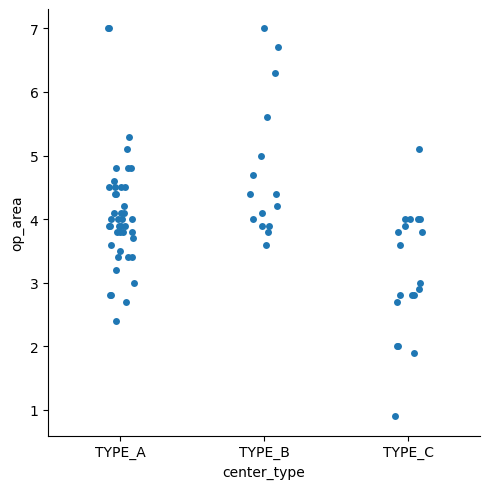

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.catplot(x = 'center_type', y = 'op_area', data=fc_df4)
plt.show()

In [22]:
fc_df4['region_code'] = fc_df4['city_code'].astype(str) + "_" + fc_df4['region_code'].astype(str)
fc_df4['region_code'].nunique()

51

so in the one city there is not any centers which are in different regions. so maybe region code will not be helpful.


In [23]:
fc_df4.drop('region_code', axis=1, inplace=True)

## MEAL INFO

In [24]:
print("Total number of different types of meal: ", meal_df3['meal_id'].nunique())

Total number of different types of meal:  51


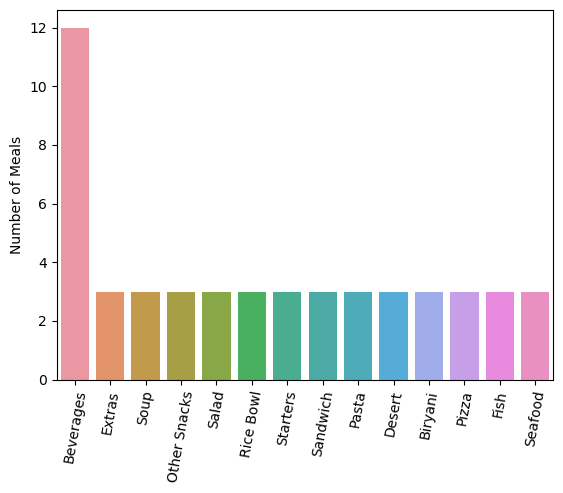

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use value_counts to get counts of each category
category_counts = meal_df3['category'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=category_counts.index, y=category_counts)
ax.set(ylabel='Number of Meals')
plt.xticks(rotation=80)
plt.show()


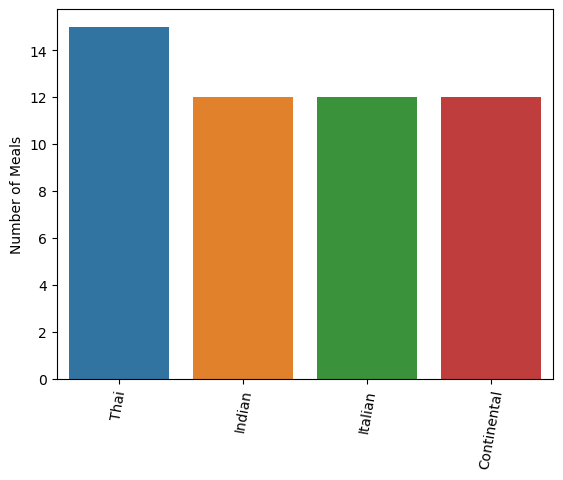

In [26]:

# Use value_counts to get counts of each cuisine
cuisine_counts = meal_df3['cuisine'].value_counts()

# Create a count plot using the counts
ax = sns.barplot(x=cuisine_counts.index, y=cuisine_counts)
ax.set(ylabel='Number of Meals')
plt.xticks(rotation=80)
plt.show()


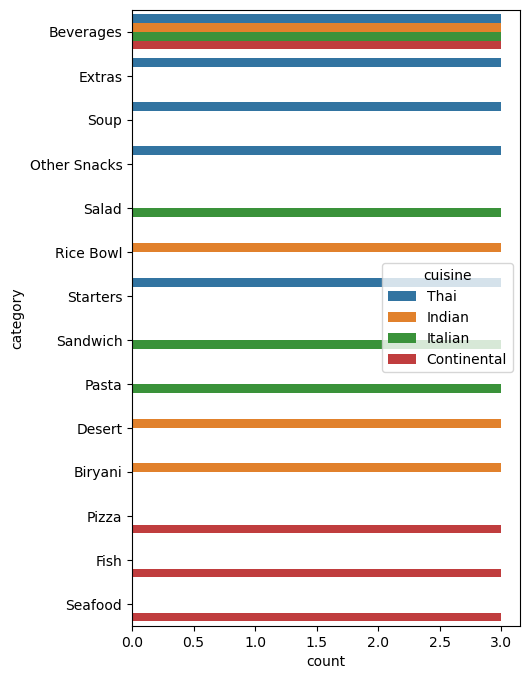

In [27]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = meal_df3['category'], hue=meal_df3['cuisine'], ax=ax)
plt.show()

In [28]:
train_df1 = pd.merge(train_df1, fc_df4, on='center_id')
test_df2 = pd.merge(test_df2, fc_df4, on='center_id')

train_df1 = pd.merge(train_df1, meal_df3, on='meal_id')
test_df2 = pd.merge(test_df2, meal_df3, on='meal_id')

In [29]:
train_df1.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         323        647   
2                      0                  0          96        647   
3                      0                  0         163        647   
4                      0                  0         215        647   

  center_type  op_area   category cuisine  
0      TYPE_C      2.0  Beverages    Thai  
1      TYPE_C      2.0  Beverages    Thai  
2      TYPE_C      2.0  Beverages    Thai  
3      TYPE_C      2.0  Beverages    Thai  
4      TYPE_C      2.0  Beverages    Thai

In [30]:
c_m_tr = (train_df1['center_id'].astype(str) + "_" + train_df1['meal_id'].astype(str)).unique()
print("there are ", len(c_m_tr), " center-meal pairs in train data")

there are  3597  center-meal pairs in train data


In [31]:
c_m_te = (test_df2['center_id'].astype(str) + "_" + test_df2['meal_id'].astype(str)).unique()
print("there are ", len(c_m_te), " center-meal pairs in test data")

there are  3548  center-meal pairs in test data


In [32]:
# check if test set has any new center-mean pair or not
print("There are ", len(set(c_m_te) - set(c_m_tr)), " new center-meal pairs in test dataset which are not present in train dataset")
print(set(c_m_te) - set(c_m_tr))

There are  3  new center-meal pairs in test dataset which are not present in train dataset
{'73_1571', '92_2104', '73_2956'}


In [33]:
test_df2[(test_df2['center_id']==73) & (test_df2['meal_id'].isin([2956, 1571]))].shape[0]

11

In [34]:
test_df2[(test_df2['center_id']==92) & (test_df2['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.


## making some new features and Feature selection

#### these are some features but i tried using them but each and all but got good result with some features.

#### Below feature is between meal and week. Because, in some seasons there is some type of food is most ordered. for example ice-cream is most ordered in summer.¶

In [35]:
train_df1["discount_ratio"] = train_df1["base_price"] / train_df1["checkout_price"]
train_df1['discount'] = (train_df1['base_price'] - train_df1['checkout_price'])

In [36]:
test_df2["discount_ratio"] = test_df2["base_price"] / test_df2["checkout_price"]
test_df2['discount'] = (test_df2['base_price'] - test_df2['checkout_price'])

In [37]:
train_df1['discount_y/n'] = [1 if x>0 else 0 for x in (train_df1['base_price']-train_df1['checkout_price'])]

In [38]:
test_df2['discount_y/n'] = [1 if x>0 else 0 for x in (test_df2['base_price']-test_df2['checkout_price'])]

#### Making comparision between weeks. this means there can be huge sales in some weeks. we can find difference between them

In [39]:
train_df1['compare_week_price'] = train_df1['checkout_price'] - train_df1['checkout_price'].shift(1)

In [40]:
test_df2['compare_week_price'] = test_df2['checkout_price'] - test_df2['checkout_price'].shift(1)

In [41]:
train_df1['b_c_p_diff'] = train_df1['base_price'] - train_df1['checkout_price']

In [42]:
test_df2['b_c_p_diff'] = test_df2['base_price'] - test_df2['checkout_price']

In [43]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
 14  discount_ratio         456548 non-nu

In [44]:
train_df1.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
center_type                   3
op_area                      30
category                     14
cuisine                       4
discount_ratio            45927
discount                   5168
discount_y/n                  2
compare_week_price         8059
b_c_p_diff                 5168
dtype: int64

In [45]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   num_orders             32573 non-null  int64  
 9   city_code              32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
 14  discount_ratio         32573 non-null  float64
 15  di

In [46]:
test_df2.nunique()

id                       32573
week                        10
center_id                   77
meal_id                     51
checkout_price            1397
base_price                1179
emailer_for_promotion        2
homepage_featured            2
num_orders                   1
city_code                   51
center_type                  3
op_area                     30
category                    14
cuisine                      4
discount_ratio            5563
discount                  1728
discount_y/n                 2
compare_week_price        2904
b_c_p_diff                1728
dtype: int64

In [47]:
train_df1['id'].duplicated().sum()

0

In [48]:
test_df2['id'].duplicated().sum()

0

In [49]:
#for checking null values

train_df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount_ratio           0
discount                 0
discount_y/n             0
compare_week_price       1
b_c_p_diff               0
dtype: int64

In [50]:
mean_value=train_df1['compare_week_price'].mean()
train_df1['compare_week_price'].fillna(value=mean_value, inplace=True) #.....Null values replaced with mean........

In [51]:
train_df1.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount_ratio           0
discount                 0
discount_y/n             0
compare_week_price       0
b_c_p_diff               0
dtype: int64

In [52]:
#for checking null values

test_df2.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount_ratio           0
discount                 0
discount_y/n             0
compare_week_price       1
b_c_p_diff               0
dtype: int64

In [53]:
mean_value=test_df2['compare_week_price'].mean()
test_df2['compare_week_price'].fillna(value=mean_value, inplace=True) #.....Null values replaced with mean........

In [54]:
test_df2.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount_ratio           0
discount                 0
discount_y/n             0
compare_week_price       0
b_c_p_diff               0
dtype: int64

In [55]:
abs(train_df1.corr()['num_orders']).sort_values(ascending=False)#........FINAL CORELLATION

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.282108
emailer_for_promotion    0.277147
base_price               0.222306
op_area                  0.176976
discount                 0.152950
b_c_p_diff               0.152950
discount_ratio           0.145193
compare_week_price       0.140272
discount_y/n             0.111766
center_id                0.053035
city_code                0.041596
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

Our output (target) variable is num_orders

If we see correlation with it, main features which has high correlation are:

Checkout_price

base_price

Emailer_promotion

Homepage_freatured

Op_area

Let’s se all features comparison.

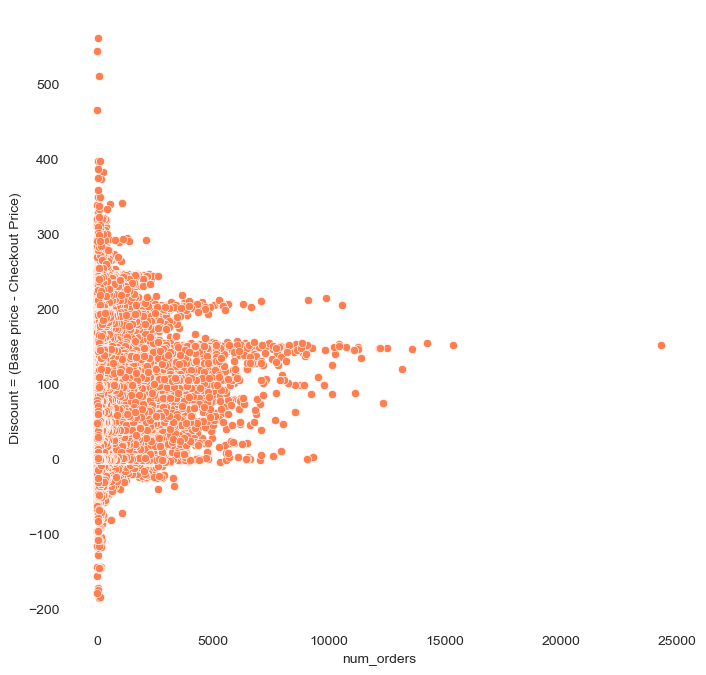

In [56]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train_df1['base_price']-train_df1['checkout_price'],x=train_df1['num_orders'],color='coral')
plt.ylabel('Discount = (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

<Axes: xlabel='num_orders', ylabel='Density'>

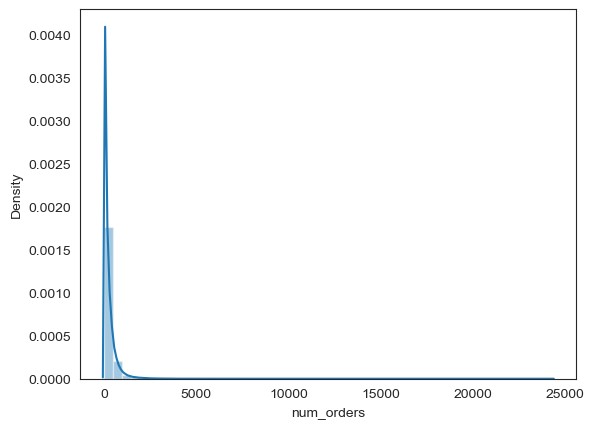

In [57]:
sns.distplot(train_df1['num_orders'])
#here it is +ve skewed and here according to pdf max values are from 0 to 2000

<Axes: xlabel='center_id', ylabel='Density'>

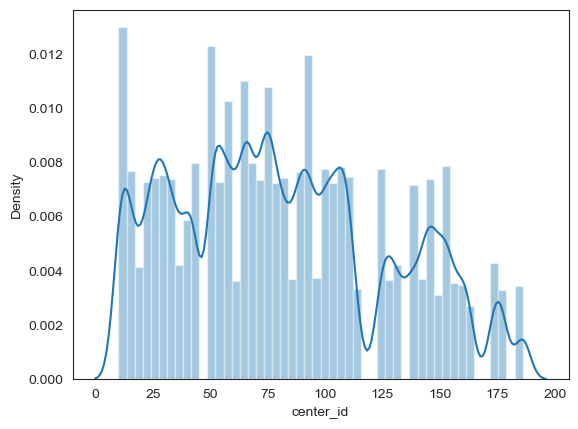

In [58]:
sns.distplot(train_df1['center_id'],kde=True)

<Axes: xlabel='week', ylabel='Density'>

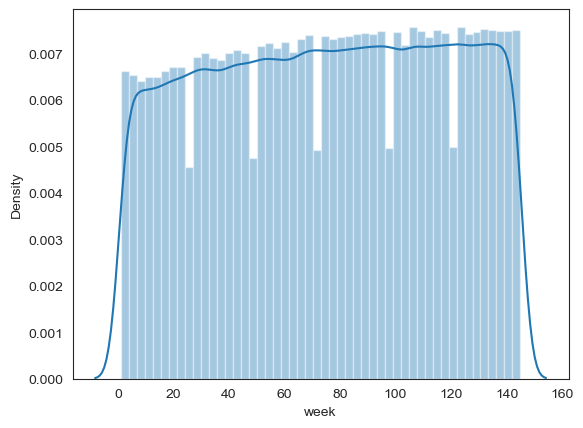

In [59]:
sns.distplot(train_df1['week'],kde=True)

If we see week column. In some weeks (i.e 22,44,66,88,12) we are getting very less orders compared to other . This means after some weeks they are getting less orders. Maximum weeks they are getting less than 5000.

<Axes: xlabel='meal_id', ylabel='Density'>

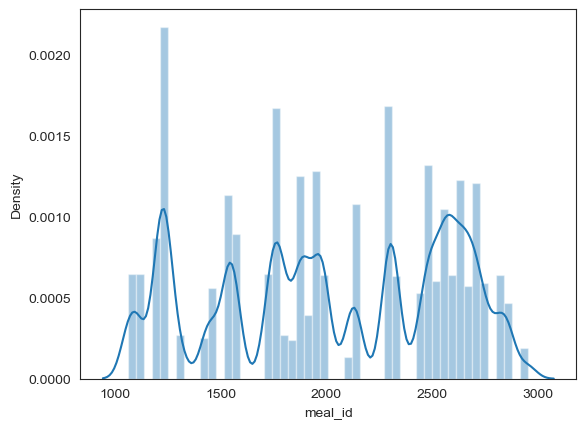

In [60]:
sns.distplot(train_df1['meal_id'],kde=True)

<Axes: xlabel='checkout_price', ylabel='Density'>

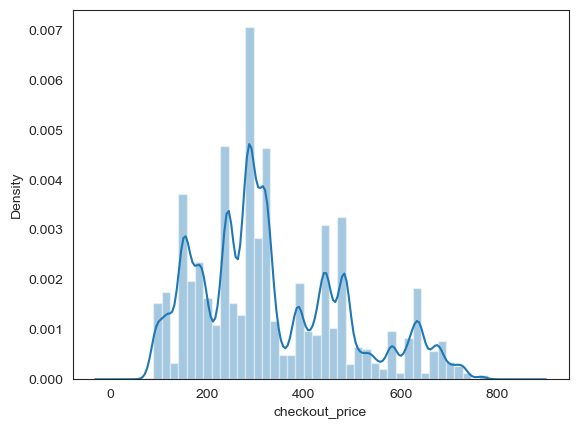

In [61]:
sns.distplot(train_df1['checkout_price'],kde=True)

<Axes: xlabel='base_price', ylabel='Density'>

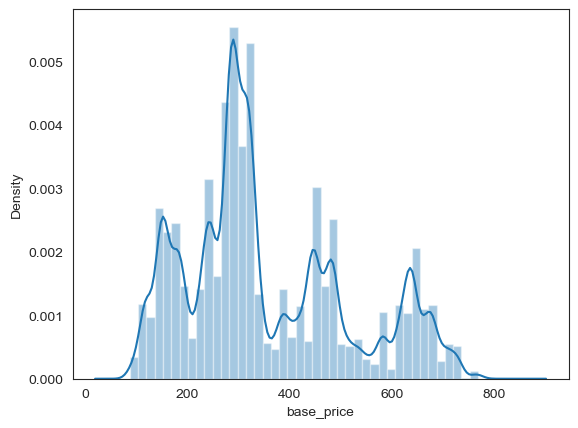

In [62]:
sns.distplot(train_df1['base_price'],kde=True)

<Axes: xlabel='city_code', ylabel='Density'>

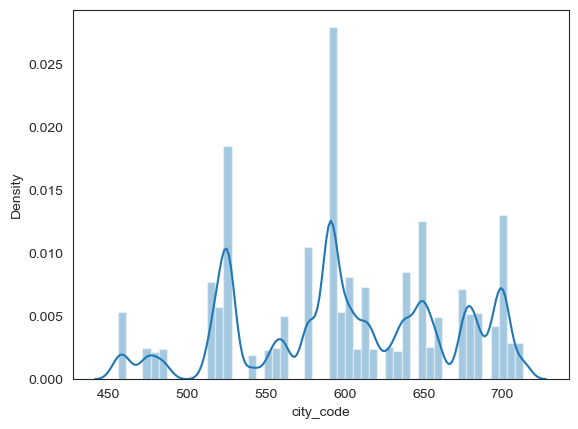

In [63]:
sns.distplot(train_df1['city_code'],kde=True)

<Axes: xlabel='emailer_for_promotion', ylabel='num_orders'>

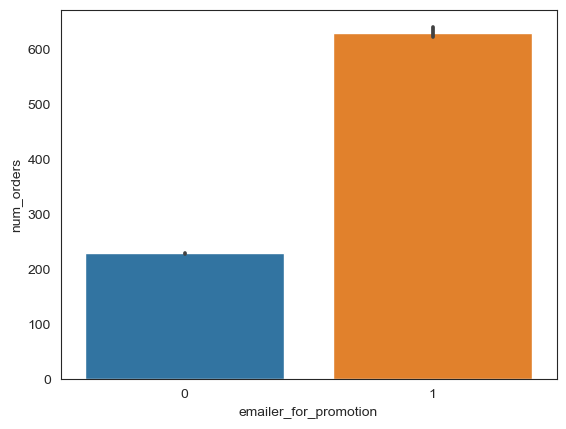

In [64]:
#relation between num_orders and emailer_for_promotion....
#this shows if the mail has sent there are more no of orders
sns.barplot(x = 'emailer_for_promotion',y = 'num_orders',data =train_df1)

<Axes: xlabel='homepage_featured', ylabel='num_orders'>

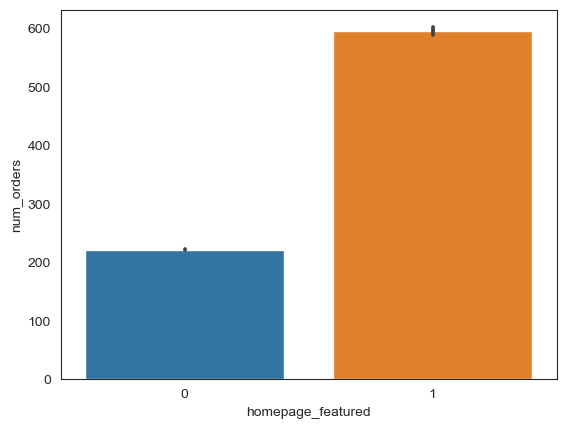

In [65]:
sns.barplot(x = 'homepage_featured',y = 'num_orders',data =train_df1)

<Axes: xlabel='category', ylabel='num_orders'>

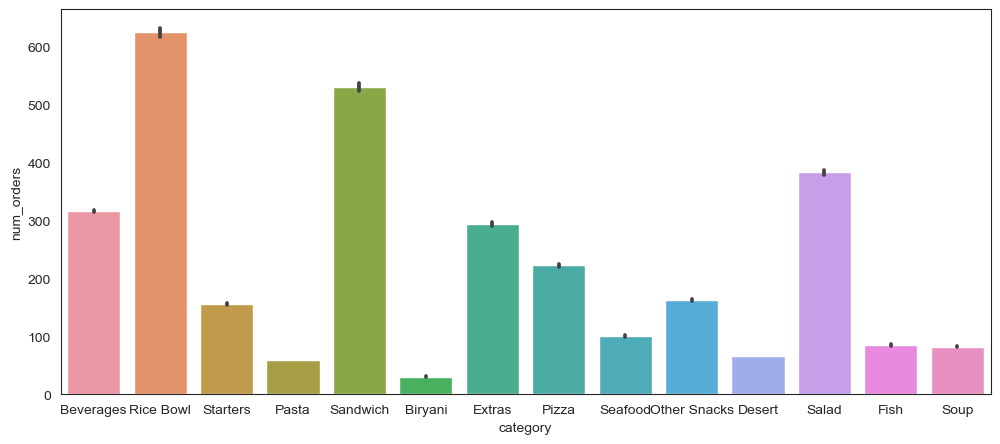

In [66]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'category',y = 'num_orders',data =train_df1)


<Axes: xlabel='cuisine', ylabel='num_orders'>

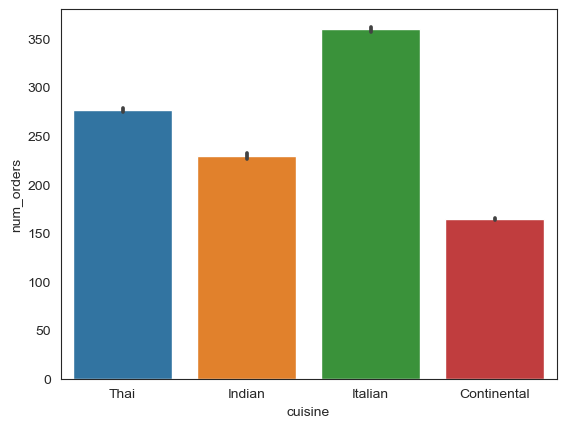

In [67]:
sns.barplot(x = 'cuisine',y = 'num_orders',data =train_df1)

<Axes: xlabel='center_type', ylabel='num_orders'>

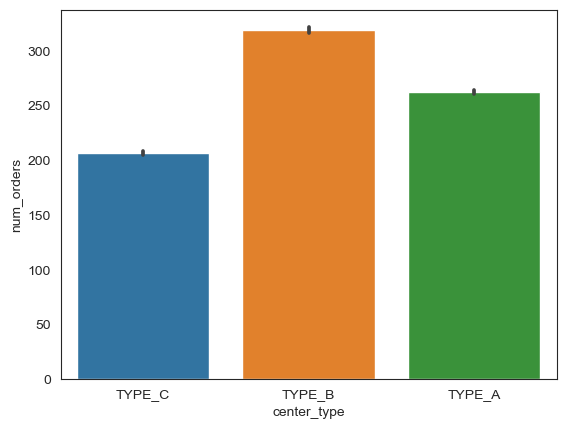

In [68]:
sns.barplot(x = 'center_type',y = 'num_orders',data =train_df1)

<Axes: xlabel='op_area', ylabel='num_orders'>

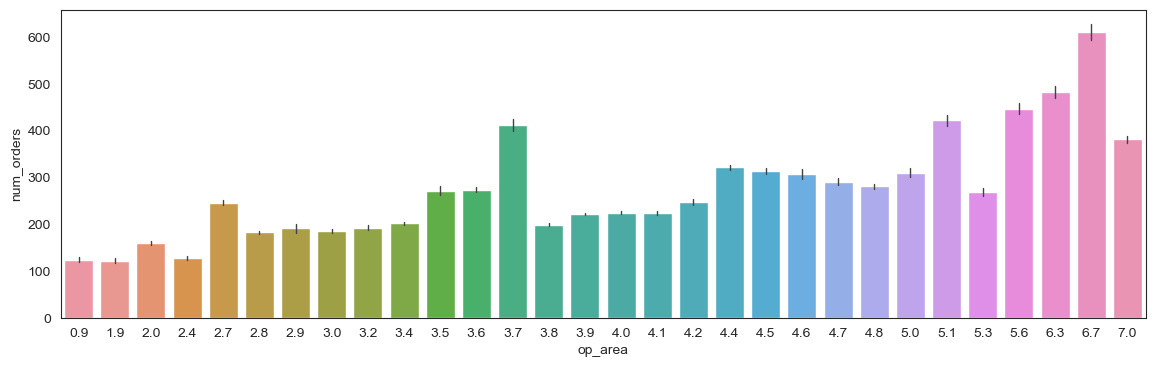

In [69]:
plt.figure(figsize=(14,4))
sns.barplot(x = 'op_area',y = 'num_orders',data =train_df1,errwidth = 1)

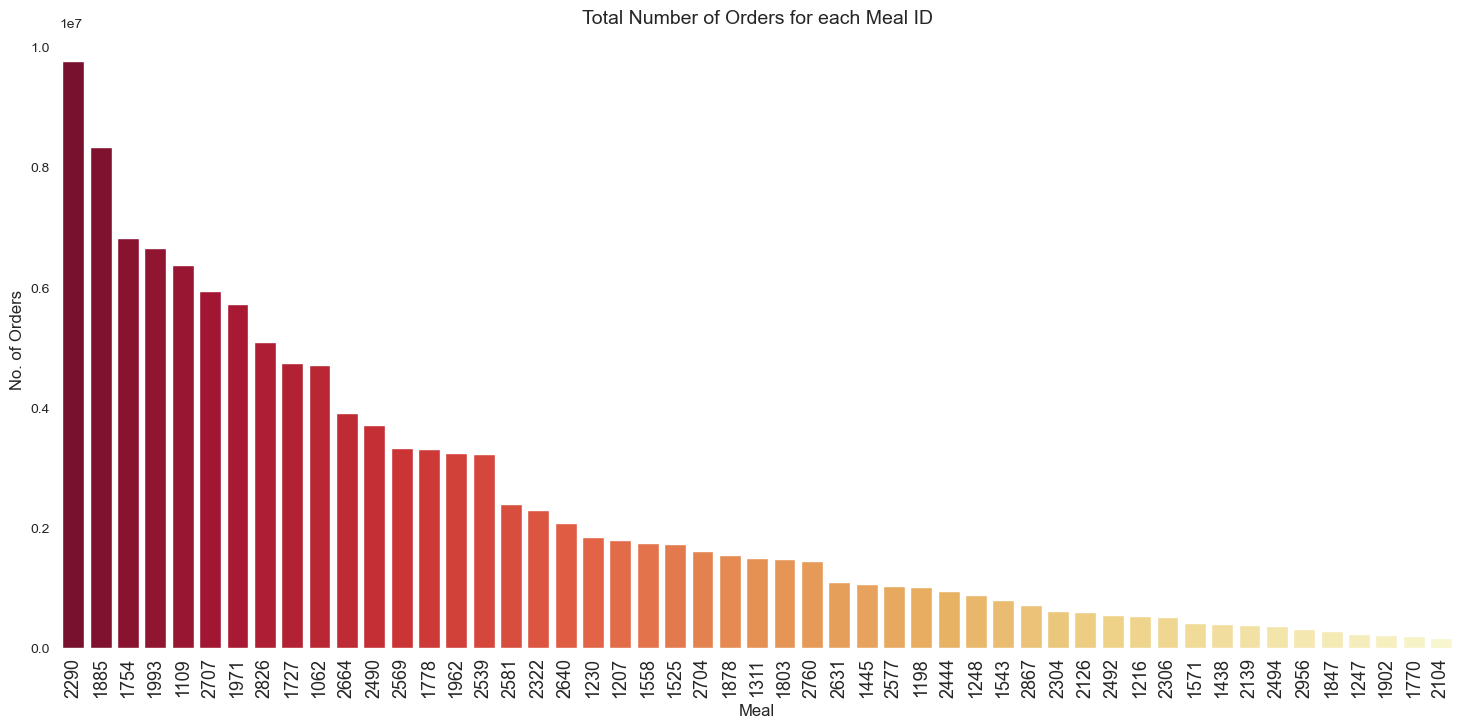

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df1 is your DataFrame

# Grouping and sorting the data
grouped_data = train_df1.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index()

# Plotting
fig = plt.figure(figsize=(18, 8))
sns.set_style("white")
plt.xticks(rotation=90, fontsize=13)
plt.title('Total Number of Orders for each Meal ID', fontdict={'fontsize': 14})

# Using sns.barplot with the correct data
sns.barplot(y='num_orders', x='meal_id', data=grouped_data, palette='YlOrRd_r',
            order=grouped_data['meal_id'].values)

plt.ylabel('No. of Orders', fontdict={'fontsize': 12})
plt.xlabel('Meal', fontdict={'fontsize': 12})
sns.despine(bottom=True, left=True)

# Show the plot
plt.show()


Meal ID 2290 has the higest number of Orders. There is not much significant differences between number of orders for different Meal IDs.

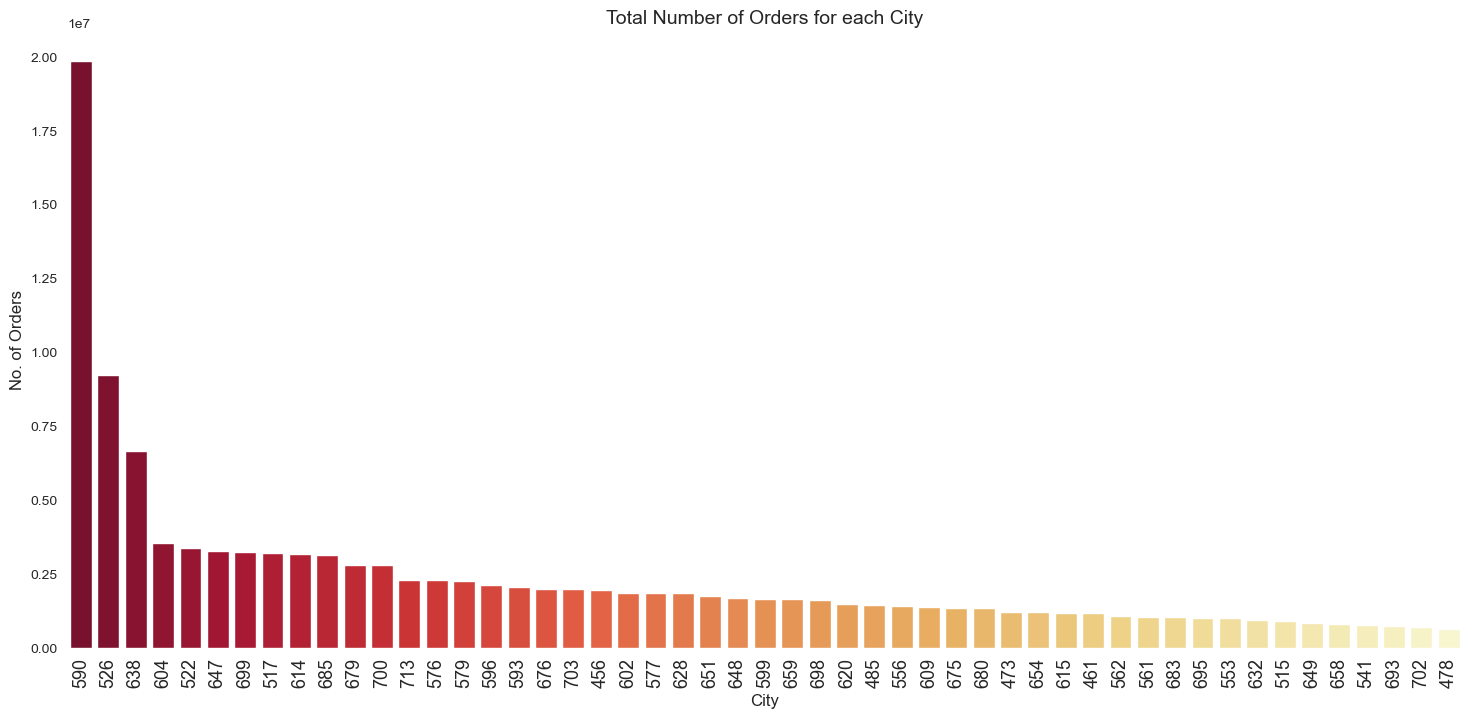

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df1 is your DataFrame

# Grouping and sorting the data
grouped_data = train_df1.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()

# Plotting
fig = plt.figure(figsize=(18, 8))
sns.set_style("white")
plt.xticks(rotation=90, fontsize=13)
plt.title('Total Number of Orders for each City', fontdict={'fontsize': 14})

# Using sns.barplot with the correct data
sns.barplot(y='num_orders', x='city_code', data=grouped_data, palette='YlOrRd_r',
            order=grouped_data['city_code'].values)

plt.ylabel('No. of Orders', fontdict={'fontsize': 12})
plt.xlabel('City', fontdict={'fontsize': 12})
sns.despine(bottom=True, left=True)

# Show the plot
plt.show()


Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

## FEATURE ENGINEERING

In [72]:
#for checking outliers
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [73]:
a=train_df1['base_price']
a

0         152.29
1         152.29
2         133.92
3         134.86
4         147.50
           ...  
456543    630.53
456544    582.03
456545    581.03
456546    581.03
456547    582.03
Name: base_price, Length: 456548, dtype: float64

In [74]:
A=test_df2['base_price']
A

0        159.11
1        159.11
2        158.14
3        157.14
4        159.11
          ...  
32568    581.03
32569    582.03
32570    629.53
32571    629.53
32572    631.53
Name: base_price, Length: 32573, dtype: float64

In [75]:
b=train_df1['checkout_price']
c=train_df1['num_orders']

In [76]:
import numpy as np
detect_outliers(a)

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27]

In [77]:
detect_outliers(b)

[866.27, 865.27, 864.27, 865.27, 866.27, 866.27, 865.27, 865.27, 866.27]

In [78]:
detect_outliers(c)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

In [79]:
B=test_df2['checkout_price']


In [80]:
detect_outliers(A)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

In [81]:
detect_outliers(B)

[866.27,
 865.27,
 864.27,
 865.27,
 866.27,
 866.27,
 865.27,
 865.27,
 866.27,
 1498,
 1485,
 1836,
 1647,
 2322,
 1931,
 1890,
 1606,
 1458,
 1620,
 1660,
 1916,
 1580,
 1552,
 1700,
 2402,
 1891,
 1808,
 1458,
 1648,
 1513,
 1620,
 1647,
 1565,
 1756,
 1511,
 1511,
 1511,
 1554,
 1891,
 1592,
 1701,
 1581,
 1972,
 1877,
 1958,
 1984,
 1890,
 1471,
 1608,
 1837,
 1513,
 1607,
 1594,
 1485,
 1486,
 2039,
 1540,
 1768,
 2187,
 1579,
 1552,
 1797,
 1755,
 1565,
 2039,
 1822,
 2121,
 2377,
 2753,
 2823,
 2660,
 2174,
 2227,
 1606,
 1769,
 1890,
 2078,
 1890,
 2105,
 1675,
 1889,
 2012,
 1756,
 1567,
 1673,
 1781,
 2066,
 1863,
 1863,
 2134,
 2186,
 1997,
 2186,
 2053,
 1863,
 1863,
 1985,
 1581,
 1566,
 2159,
 2038,
 1620,
 1660,
 1796,
 1500,
 1986,
 1473,
 1458,
 1715,
 1486,
 1485,
 1472,
 1635,
 2080,
 1634,
 1700,
 1539,
 1716,
 1565,
 1702,
 1742,
 1727,
 1754,
 1539,
 1621,
 1621,
 1540,
 1862,
 1727,
 1459,
 2132,
 1891,
 2067,
 2472,
 1863,
 1972,
 2106,
 2146,
 1998,
 2511,
 2

<Axes: ylabel='week'>

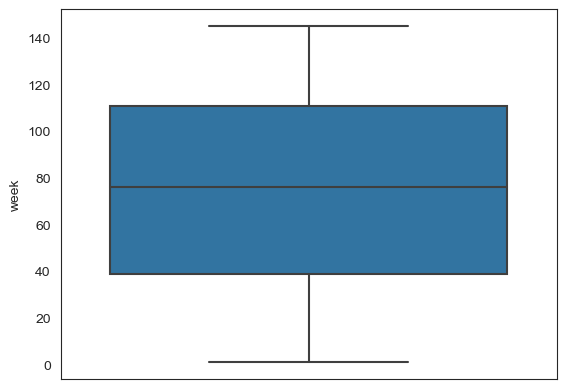

In [82]:
sns.boxplot(y = 'week', data = train_df1)

<Axes: ylabel='week'>

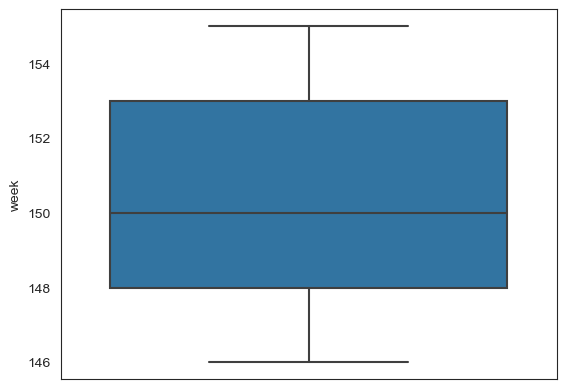

In [83]:
sns.boxplot(y = 'week', data = test_df2)

<Axes: ylabel='meal_id'>

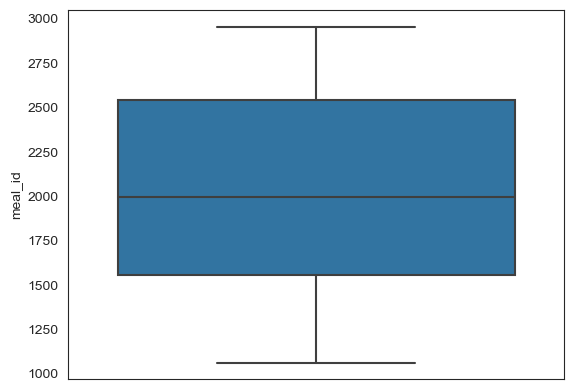

In [84]:
sns.boxplot(y = 'meal_id', data = train_df1)

<Axes: ylabel='meal_id'>

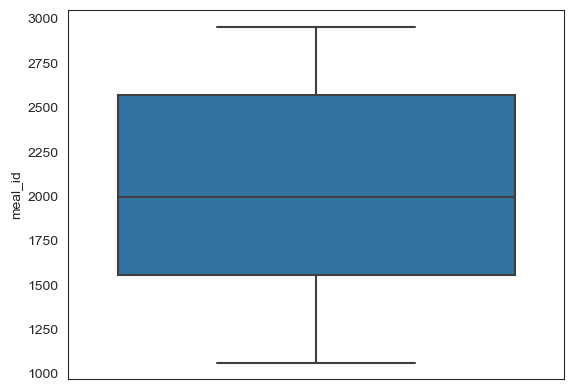

In [85]:
sns.boxplot(y = 'meal_id', data = test_df2)

<Axes: ylabel='center_id'>

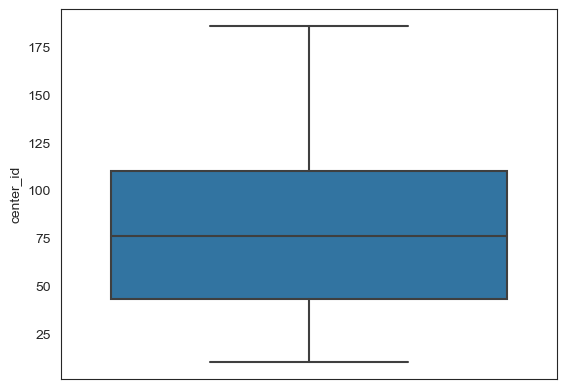

In [86]:
sns.boxplot(y = 'center_id', data = train_df1)

<Axes: ylabel='center_id'>

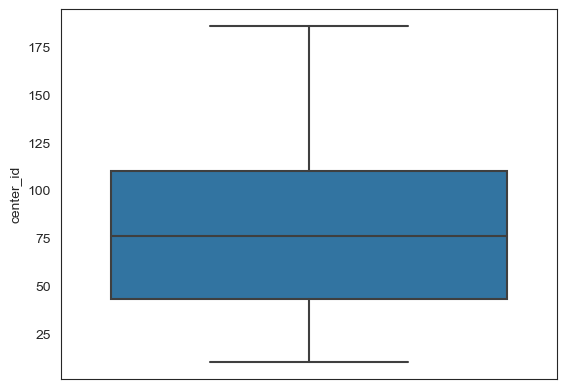

In [87]:
sns.boxplot(y = 'center_id', data = test_df2)

In [88]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  object 
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  object 
 13  cuisine                456548 non-null  object 
 14  discount_ratio         456548 non-nu

In [89]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   num_orders             32573 non-null  int64  
 9   city_code              32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
 14  discount_ratio         32573 non-null  float64
 15  di

## ENCODING

In [90]:
#using label encoding
categ = ['category', 'cuisine','center_type']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
train_df1[categ] = train_df1[categ].apply(le.fit_transform)

In [91]:
#using label encoding
categ = ['category', 'cuisine','center_type']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
test_df2[categ] = test_df2[categ].apply(le.fit_transform)

In [92]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  int32  
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  int32  
 13  cuisine                456548 non-null  int32  
 14  discount_ratio         456548 non-nu

In [93]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   num_orders             32573 non-null  int64  
 9   city_code              32573 non-null  int64  
 10  center_type            32573 non-null  int32  
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  int32  
 13  cuisine                32573 non-null  int32  
 14  discount_ratio         32573 non-null  float64
 15  di

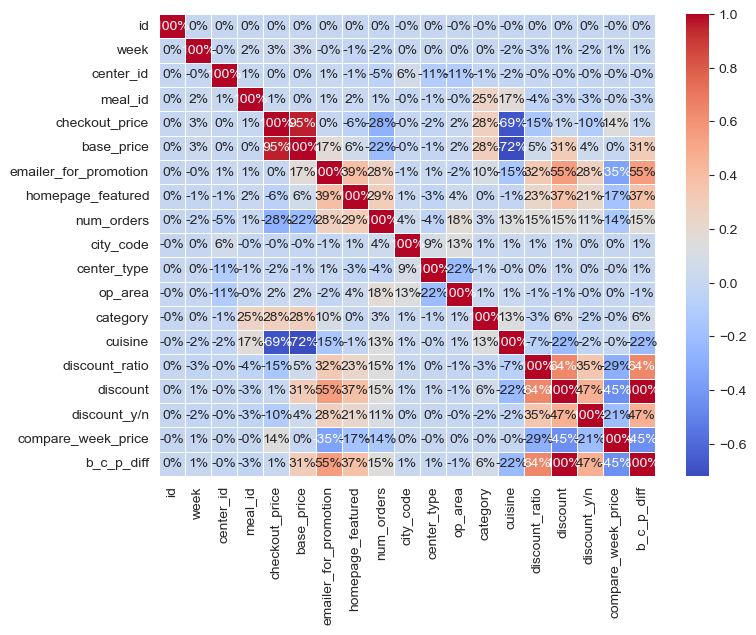

In [94]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(train_df1.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

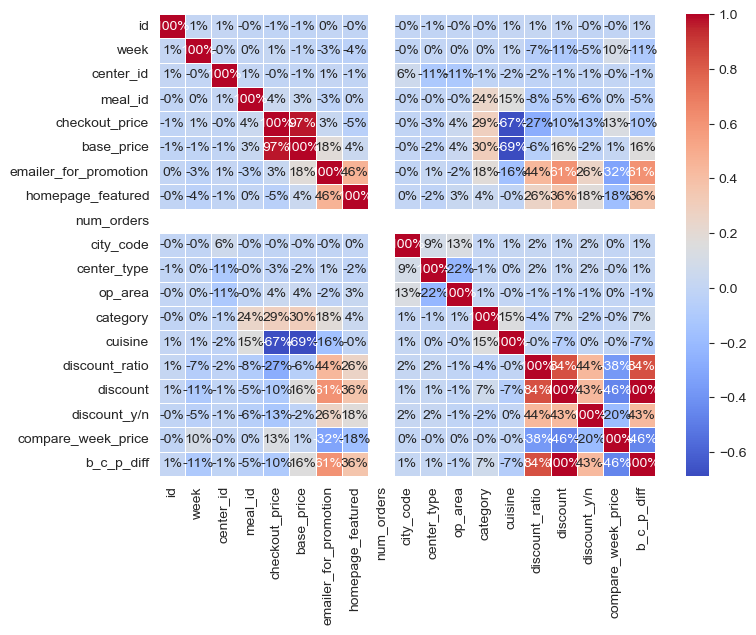

In [95]:
# Create a heatmap with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(test_df2.corr(), annot=True, fmt='.0%', cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

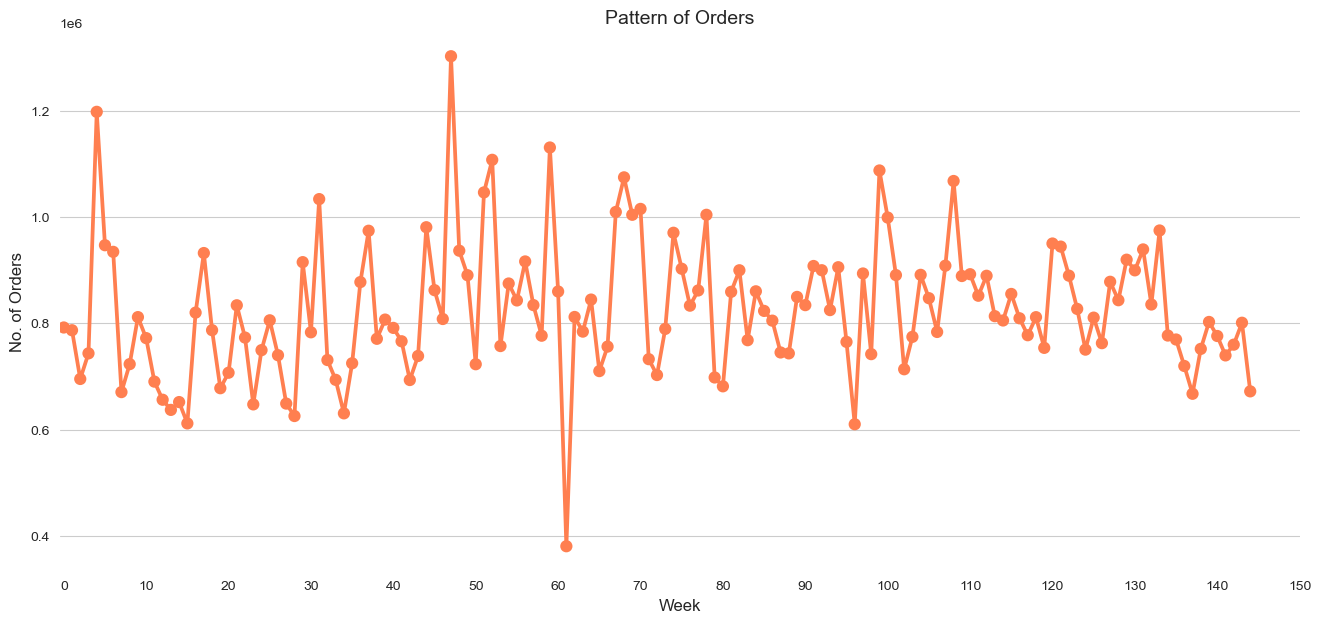

In [96]:
fig = plt.figure(figsize=(16, 7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders', fontdict={'fontsize': 14})

# Use the number of weeks to determine the ticks and labels
weeks = np.arange(0, 160, 10)
sns.pointplot(x=train_df1.groupby('week').sum().reset_index()['week'],
              y=train_df1.groupby('week').sum().reset_index()['num_orders'],
              color='coral')

plt.xticks(weeks, list(map(str, weeks)))  # Convert numbers to strings for labels
plt.ylabel('No. of Orders', fontdict={'fontsize': 12})
plt.xlabel('Week', fontdict={'fontsize': 12})
sns.despine(bottom=True, left=True);


When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

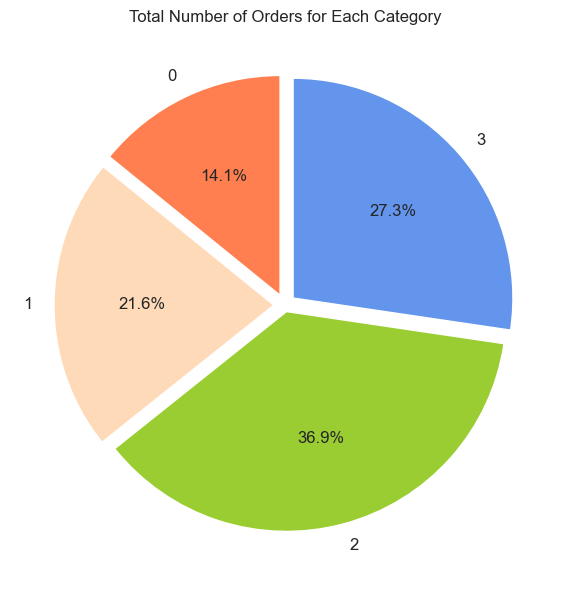

In [97]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train_df1.groupby(['cuisine']).num_orders.sum(),
    labels=train_df1.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

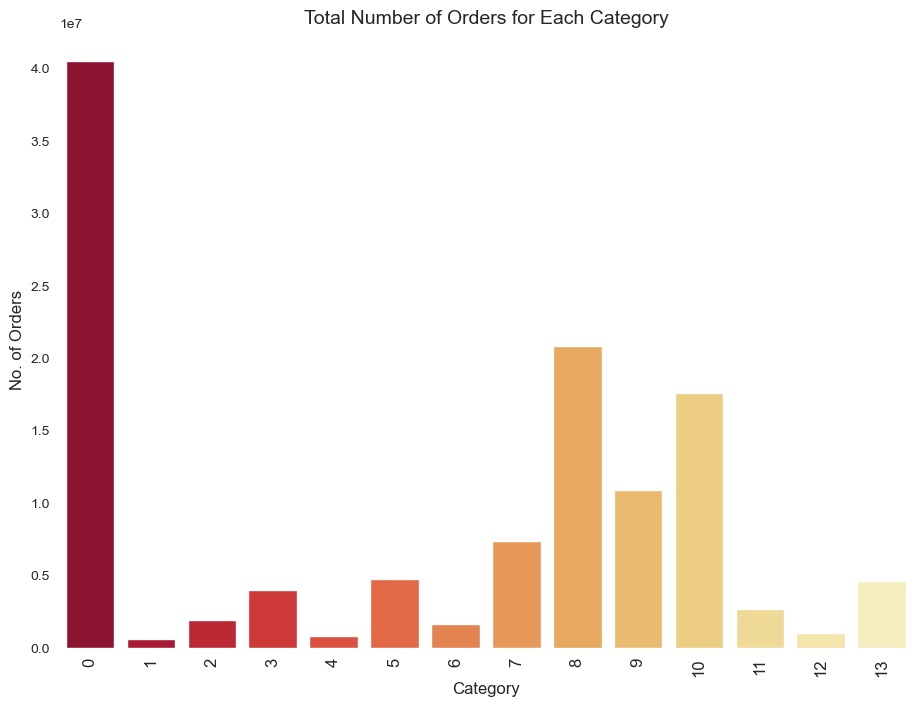

In [98]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train_df1.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


In [99]:
train_data=train_df1.copy()

In [100]:
train_data.shape

(456548, 19)

In [101]:
train_data.info()#there is null value in compare_week_price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  int32  
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  int32  
 13  cuisine                456548 non-null  int32  
 14  discount_ratio         456548 non-nu

In [102]:
abs(train_data.corr()['num_orders']).sort_values(ascending=False)#........FINAL CORELLATION

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.282108
emailer_for_promotion    0.277147
base_price               0.222306
op_area                  0.176976
b_c_p_diff               0.152950
discount                 0.152950
discount_ratio           0.145193
compare_week_price       0.140272
cuisine                  0.127653
discount_y/n             0.111766
center_id                0.053035
city_code                0.041596
center_type              0.038199
category                 0.026520
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

# Feature selection


#### here i tried with different combinations but these are only features good for model¶

Building base model by splitting the last 10 week of the train dataset as test.

In [103]:
train_data.drop([ 'discount_y/n','compare_week_price'], axis = 1,inplace=True)

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  center_type            456548 non-null  int32  
 11  op_area                456548 non-null  float64
 12  category               456548 non-null  int32  
 13  cuisine                456548 non-null  int32  
 14  discount_ratio         456548 non-nu

In [105]:
train_data['num_orders']=np.log1p(train_data['num_orders']) #.........making LOG TRANSFORMATION for removing outliers


In [106]:
test_data=test_df2.copy()

In [128]:
test_data.drop([ 'discount_y/n','compare_week_price'], axis = 1,inplace=True)

##### Train Test Split

In [129]:
train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]

In [130]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (423727, 17)
The Shape of Test dataset : (32821, 17)


## Base Model

### Building base model by splitting the last 10 week of the train dataset as test.

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt


In [132]:
train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id', 'num_orders','week'],axis=1)
y_test=test['num_orders']


reg = LinearRegression()
reg.fit(X_train,y_train)

print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))
y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))



Train Score : 0.3284580555539862
Test Score : 0.28447980136507633
R squared : 0.28447980136507633
RMSE : 0.9720347857826552


## Linear Model 2 : Applying Standard Scaling & Log Transformation

In [133]:
sc=StandardScaler()

cat=train_data.drop(['checkout_price','base_price','discount','discount_ratio','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
num=train_data[['checkout_price','base_price','discount','discount_ratio','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff']]
scal= pd.DataFrame(sc.fit_transform(num),columns=num.columns)
datas=pd.concat([scal,cat],axis=1)

train=datas[datas['week'].isin(range(1,136))]
test=datas[datas['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=np.log(train['num_orders']) #Applying Log Transformation on the Target Feature

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=np.log(test['num_orders']) #Applying Log Transformation on the Target Feature

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.3075366685510911
Test Score : 0.2786255337820813
R squared : 0.2786255337820813
RMSLE : 0.21676630293111954


#### Linear Model doesn't seems to be yielding much better result. Therefore, we are proceeding with advanced models & ensemble techniques.

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [135]:
train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week','checkout_price','base_price','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','checkout_price','base_price','discount','discount_ratio','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_test=test['num_orders']


In [138]:
from sklearn.metrics import r2_score
#Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test) #Make predictions on the test set
#linear_mse = mean_squared_error(y_test, linear_predictions) #Evaluate the performance of the Linear Regression model
#print("---Linear Regression Mean Squared Error:", linear_mse)
print('LINEAR_MODEL')
print('\nRMSE_linear :',np.sqrt(mean_squared_error(y_test,linear_predictions)))

print('Train Score_linear :',linear_model.score(X_train,y_train))
print('Test Score_linear :',linear_model.score(X_test,y_test))

r2 = r2_score(y_test, linear_predictions)
print(f'R-squared_lr: {r2}')

#RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
#rf_mse = mean_squared_error(y_test, rf_predictions)
#print("\n---Random Forest Mean Squared Error:", rf_mse)
print('\nRANDOM FOREST_MODEL')
print('\nRMSE_rf :',np.sqrt(mean_squared_error(y_test,rf_predictions)))
print('Train Score_rf :',rf_model.score(X_train,y_train))
print('Test Score_rf :',rf_model.score(X_test,y_test))

r2 = r2_score(y_test, rf_predictions)
print(f'R-squared_rf: {r2}')

#DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
#dt_mse = mean_squared_error(y_test, dt_predictions)
#print("\n---Decision Tree Mean Squared Error:", dt_mse)
print('\nDECISION TREE_MODEL')
print('\nRMSE_dt :',np.sqrt(mean_squared_error(y_test,dt_predictions)))
print('Train Score_dt :',dt_model.score(X_train,y_train))
print('Test Score_dt :',dt_model.score(X_test,y_test))

r2 = r2_score(y_test, dt_predictions)
print(f'R-squared_dt: {r2}')

#GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
#gb_mse = mean_squared_error(y_test, gb_predictions)
#print("\n---Gradient Boosting Mean Squared Error:", gb_mse)
print('\nGRADIENT BOOST_MODEL')
print('\nRMSE_gb :',np.sqrt(mean_squared_error(y_test,gb_predictions)))
print('Train Score_gb :',gb_model.score(X_train,y_train))
print('Test Score_gb :',gb_model.score(X_test,y_test))

r2 = r2_score(y_test, gb_predictions)
print(f'R-squared_gb: {r2}')

#XGBoostingRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print('\nXG BOOST_MODEL')
#xgb_mse = mean_squared_error(y_test, xgb_predictions)
#print("\n---XG Boost Mean Squared Error:", xgb_mse)
print('\nRMSE_xgb :',np.sqrt(mean_squared_error(y_test,xgb_predictions)))
print('Train Score_xgb :',xgb_model.score(X_train,y_train))
print('Test Score_xgb :',xgb_model.score(X_test,y_test))

r2 = r2_score(y_test, xgb_predictions)
print(f'R-squared_xgb: {r2}')


#LGBoostRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
#lgb_mse = mean_squared_error(y_test, lgb_predictions)
#print("\n---Light Boost Mean Squared Error:", lgb_mse)
print('\nLG BOOST_MODEL')
print('\nRMSE_lgb :',np.sqrt(mean_squared_error(y_test,lgb_predictions)))
print('Train Score_lgb :',lgb_model.score(X_train,y_train))
print('Test Score_lgb :',lgb_model.score(X_test,y_test))

r2 = r2_score(y_test, lgb_predictions)
print(f'R-squared_lgb: {r2}')

#CatBoostRegressor
cgb_model = CatBoostRegressor()
cgb_model.fit(X_train, y_train)
cgb_predictions = cgb_model.predict(X_test)
#print("\n---Cat Boost Mean Squared Error:", cgb_mse)
#print('Train Score_cgb :',cgb_model.score(X_train,y_train))
print('\nCAT BOOST_MODEL')
print('\nRMSE_cgb :',np.sqrt(mean_squared_error(y_test,cgb_predictions)))
print('Test Score_cgb :',cgb_model.score(X_test,y_test))

r2 = r2_score(y_test, cgb_predictions)
print(f'R-squared_cgb: {r2}')

LINEAR_MODEL

RMSE_linear : 1.1485133773661729
Train Score_linear : 0.004014981156311936
Test Score_linear : 0.0010807097305942648
R-squared_lr: 0.0010807097305942648

RANDOM FOREST_MODEL

RMSE_rf : 0.613217278689331
Train Score_rf : 0.732320548191489
Test Score_rf : 0.7152347107787012
R-squared_rf: 0.7152347107787012

DECISION TREE_MODEL

RMSE_dt : 0.6131536134784263
Train Score_dt : 0.7323439253164334
Test Score_dt : 0.7152938372961761
R-squared_dt: 0.7152938372961761

GRADIENT BOOST_MODEL

RMSE_gb : 0.8093140463454331
Train Score_gb : 0.5022506975996401
Test Score_gb : 0.5039877071418821
R-squared_gb: 0.5039877071418821

XG BOOST_MODEL

RMSE_xgb : 0.6426480938517588
Train Score_xgb : 0.7022703559819018
Test Score_xgb : 0.687244661631828
R-squared_xgb: 0.687244661631828
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

135:	learn: 0.7754228	total: 6.42s	remaining: 40.8s
136:	learn: 0.7750601	total: 6.45s	remaining: 40.6s
137:	learn: 0.7745162	total: 6.49s	remaining: 40.5s
138:	learn: 0.7735081	total: 6.54s	remaining: 40.5s
139:	learn: 0.7729594	total: 6.58s	remaining: 40.4s
140:	learn: 0.7726946	total: 6.61s	remaining: 40.3s
141:	learn: 0.7719792	total: 6.66s	remaining: 40.2s
142:	learn: 0.7710789	total: 6.7s	remaining: 40.1s
143:	learn: 0.7701606	total: 6.74s	remaining: 40.1s
144:	learn: 0.7699503	total: 6.77s	remaining: 39.9s
145:	learn: 0.7694145	total: 6.82s	remaining: 39.9s
146:	learn: 0.7684548	total: 6.86s	remaining: 39.8s
147:	learn: 0.7682620	total: 6.9s	remaining: 39.7s
148:	learn: 0.7677529	total: 6.95s	remaining: 39.7s
149:	learn: 0.7670649	total: 6.99s	remaining: 39.6s
150:	learn: 0.7666089	total: 7.03s	remaining: 39.5s
151:	learn: 0.7662366	total: 7.08s	remaining: 39.5s
152:	learn: 0.7654965	total: 7.12s	remaining: 39.4s
153:	learn: 0.7647736	total: 7.16s	remaining: 39.3s
154:	learn: 0.

296:	learn: 0.7232019	total: 13s	remaining: 30.7s
297:	learn: 0.7230570	total: 13s	remaining: 30.7s
298:	learn: 0.7229177	total: 13.1s	remaining: 30.6s
299:	learn: 0.7228319	total: 13.1s	remaining: 30.5s
300:	learn: 0.7226160	total: 13.1s	remaining: 30.5s
301:	learn: 0.7223661	total: 13.2s	remaining: 30.4s
302:	learn: 0.7222704	total: 13.2s	remaining: 30.4s
303:	learn: 0.7221390	total: 13.2s	remaining: 30.3s
304:	learn: 0.7220206	total: 13.3s	remaining: 30.3s
305:	learn: 0.7218986	total: 13.3s	remaining: 30.2s
306:	learn: 0.7217614	total: 13.4s	remaining: 30.2s
307:	learn: 0.7216444	total: 13.4s	remaining: 30.1s
308:	learn: 0.7213991	total: 13.5s	remaining: 30.1s
309:	learn: 0.7212211	total: 13.5s	remaining: 30.1s
310:	learn: 0.7210659	total: 13.5s	remaining: 30s
311:	learn: 0.7209907	total: 13.6s	remaining: 29.9s
312:	learn: 0.7207723	total: 13.6s	remaining: 29.9s
313:	learn: 0.7205899	total: 13.7s	remaining: 29.8s
314:	learn: 0.7203812	total: 13.7s	remaining: 29.8s
315:	learn: 0.7202

459:	learn: 0.7043076	total: 19.4s	remaining: 22.8s
460:	learn: 0.7041962	total: 19.4s	remaining: 22.7s
461:	learn: 0.7041181	total: 19.5s	remaining: 22.7s
462:	learn: 0.7040227	total: 19.5s	remaining: 22.6s
463:	learn: 0.7038950	total: 19.6s	remaining: 22.6s
464:	learn: 0.7038501	total: 19.6s	remaining: 22.5s
465:	learn: 0.7037783	total: 19.6s	remaining: 22.5s
466:	learn: 0.7037113	total: 19.7s	remaining: 22.5s
467:	learn: 0.7036515	total: 19.7s	remaining: 22.4s
468:	learn: 0.7035785	total: 19.8s	remaining: 22.4s
469:	learn: 0.7035105	total: 19.8s	remaining: 22.4s
470:	learn: 0.7034224	total: 19.9s	remaining: 22.3s
471:	learn: 0.7033962	total: 19.9s	remaining: 22.3s
472:	learn: 0.7033127	total: 19.9s	remaining: 22.2s
473:	learn: 0.7031757	total: 20s	remaining: 22.2s
474:	learn: 0.7030906	total: 20s	remaining: 22.1s
475:	learn: 0.7029866	total: 20.1s	remaining: 22.1s
476:	learn: 0.7028568	total: 20.1s	remaining: 22s
477:	learn: 0.7027640	total: 20.1s	remaining: 22s
478:	learn: 0.702729

619:	learn: 0.6934933	total: 32.1s	remaining: 19.7s
620:	learn: 0.6934616	total: 32.2s	remaining: 19.6s
621:	learn: 0.6934297	total: 32.2s	remaining: 19.6s
622:	learn: 0.6933845	total: 32.3s	remaining: 19.5s
623:	learn: 0.6933297	total: 32.3s	remaining: 19.5s
624:	learn: 0.6932461	total: 32.4s	remaining: 19.4s
625:	learn: 0.6931944	total: 32.4s	remaining: 19.4s
626:	learn: 0.6931275	total: 32.5s	remaining: 19.3s
627:	learn: 0.6930517	total: 32.6s	remaining: 19.3s
628:	learn: 0.6930132	total: 32.6s	remaining: 19.2s
629:	learn: 0.6929616	total: 32.7s	remaining: 19.2s
630:	learn: 0.6928387	total: 32.7s	remaining: 19.1s
631:	learn: 0.6928110	total: 32.8s	remaining: 19.1s
632:	learn: 0.6927483	total: 32.8s	remaining: 19s
633:	learn: 0.6927255	total: 32.9s	remaining: 19s
634:	learn: 0.6926456	total: 33s	remaining: 18.9s
635:	learn: 0.6926118	total: 33s	remaining: 18.9s
636:	learn: 0.6925561	total: 33.1s	remaining: 18.8s
637:	learn: 0.6924965	total: 33.1s	remaining: 18.8s
638:	learn: 0.692444

779:	learn: 0.6858057	total: 41.1s	remaining: 11.6s
780:	learn: 0.6857608	total: 41.2s	remaining: 11.5s
781:	learn: 0.6857189	total: 41.2s	remaining: 11.5s
782:	learn: 0.6856724	total: 41.3s	remaining: 11.4s
783:	learn: 0.6856216	total: 41.3s	remaining: 11.4s
784:	learn: 0.6855821	total: 41.4s	remaining: 11.3s
785:	learn: 0.6854838	total: 41.4s	remaining: 11.3s
786:	learn: 0.6854484	total: 41.5s	remaining: 11.2s
787:	learn: 0.6854160	total: 41.6s	remaining: 11.2s
788:	learn: 0.6853211	total: 41.6s	remaining: 11.1s
789:	learn: 0.6852991	total: 41.7s	remaining: 11.1s
790:	learn: 0.6852196	total: 41.7s	remaining: 11s
791:	learn: 0.6851940	total: 41.8s	remaining: 11s
792:	learn: 0.6851671	total: 41.9s	remaining: 10.9s
793:	learn: 0.6851188	total: 41.9s	remaining: 10.9s
794:	learn: 0.6850235	total: 42s	remaining: 10.8s
795:	learn: 0.6849540	total: 42s	remaining: 10.8s
796:	learn: 0.6849203	total: 42.1s	remaining: 10.7s
797:	learn: 0.6848825	total: 42.1s	remaining: 10.7s
798:	learn: 0.684843

939:	learn: 0.6798238	total: 50.2s	remaining: 3.21s
940:	learn: 0.6797837	total: 50.3s	remaining: 3.15s
941:	learn: 0.6797351	total: 50.4s	remaining: 3.1s
942:	learn: 0.6796913	total: 50.4s	remaining: 3.05s
943:	learn: 0.6796654	total: 50.5s	remaining: 2.99s
944:	learn: 0.6796321	total: 50.5s	remaining: 2.94s
945:	learn: 0.6795986	total: 50.6s	remaining: 2.89s
946:	learn: 0.6795731	total: 50.6s	remaining: 2.83s
947:	learn: 0.6795523	total: 50.7s	remaining: 2.78s
948:	learn: 0.6795304	total: 50.8s	remaining: 2.73s
949:	learn: 0.6794784	total: 50.8s	remaining: 2.67s
950:	learn: 0.6794563	total: 50.9s	remaining: 2.62s
951:	learn: 0.6794063	total: 50.9s	remaining: 2.57s
952:	learn: 0.6793922	total: 51s	remaining: 2.51s
953:	learn: 0.6793468	total: 51s	remaining: 2.46s
954:	learn: 0.6792706	total: 51.1s	remaining: 2.41s
955:	learn: 0.6792443	total: 51.2s	remaining: 2.35s
956:	learn: 0.6792232	total: 51.2s	remaining: 2.3s
957:	learn: 0.6791923	total: 51.3s	remaining: 2.25s
958:	learn: 0.6791

Lets apply the best models on the real test data

## CatBoost Regressor

In [139]:
from sklearn.metrics import mean_squared_log_error

train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week','checkout_price','base_price','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','checkout_price','base_price','discount','discount_ratio','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_test=test['num_orders']


cb=CatBoostRegressor(
    iterations=1700, 
    learning_rate=0.036, 
    max_depth=12, 
    l2_leaf_reg=10,
    loss_function='RMSE',
    random_seed=2000,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    subsample=0.25
    
    )

cb.fit(X_train,y_train)

print('Train Score :',cb.score(X_train,y_train))
print('Test Score :',cb.score(X_test,y_test))

y_pred = cb.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('rmsle: ', mean_squared_log_error(y_test,y_pred) )     #50.0875283203

0:	learn: 1.1921401	total: 136ms	remaining: 3m 50s
100:	learn: 0.8445082	total: 11.3s	remaining: 2m 58s
200:	learn: 0.7668496	total: 21.8s	remaining: 2m 42s
300:	learn: 0.7340252	total: 32s	remaining: 2m 28s
400:	learn: 0.7151597	total: 42.3s	remaining: 2m 17s
500:	learn: 0.7017330	total: 52.5s	remaining: 2m 5s
600:	learn: 0.6922495	total: 1m 2s	remaining: 1m 54s
700:	learn: 0.6848586	total: 1m 12s	remaining: 1m 43s
800:	learn: 0.6788555	total: 1m 23s	remaining: 1m 33s
900:	learn: 0.6737039	total: 1m 33s	remaining: 1m 22s
1000:	learn: 0.6693699	total: 1m 42s	remaining: 1m 11s
1100:	learn: 0.6656708	total: 1m 53s	remaining: 1m 1s
1200:	learn: 0.6626857	total: 2m 2s	remaining: 51.1s
1300:	learn: 0.6599113	total: 2m 11s	remaining: 40.5s
1400:	learn: 0.6574594	total: 2m 21s	remaining: 30.1s
1500:	learn: 0.6553634	total: 2m 30s	remaining: 19.9s
1600:	learn: 0.6533922	total: 2m 40s	remaining: 9.93s
1699:	learn: 0.6514692	total: 2m 50s	remaining: 0us
Train Score : 0.7087394167695376
Test Scor

In [140]:
main_pred = cb.predict(test_data)
pred= pd.Series(main_pred,name='num_orders')
Result=pd.DataFrame(main_pred)
Result=np.expm1(Result).astype('int64') #here we are making exponential because we are doing log to our target variable


In [141]:
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test_data['id']
Submission['num_orders'] = Result.values
Submission.to_csv('fdp_final_submission_catboost.csv', index=False)

In [142]:
Submission.head()

id  num_orders
0  1028232         222
1  1262649         222
2  1453211         222
3  1262599         222
4  1495848         222

##### XGBOOST

In [143]:
train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount','city_code'],axis=1)
y_test=test['num_orders']
xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

Train Score : 0.865963168087602
Test Score : 0.7918703289879531
Explained Variance : 0.7540927125676667
RMSLE : 0.5242492972037056


In [145]:
main_pred = xgb.predict(test_data.drop(['id', 'week', 'city_code','discount', 'num_orders'], axis=1))

pred = pd.Series(main_pred, name='num_orders')
Result = pd.DataFrame(main_pred)
Result = np.expm1(Result).astype('int64')  # Applying the inverse of log transformation

# Ensure Result has the same column names as your original data
Result.columns = ['num_orders']


In [146]:
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test_data['id']
Submission['num_orders'] = Result.values
Submission.to_csv('fdp_final_submission_xgboost.csv', index=False)

In [147]:
Submission.head()

id  num_orders
0  1028232         112
1  1262649         125
2  1453211          95
3  1262599         107
4  1495848         181

##### LightBoost Regressor

In [148]:
train=train_data[train_data['week'].isin(range(1,136))]
test=train_data[train_data['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','checkout_price','base_price','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','checkout_price','base_price','discount','discount_ratio','emailer_for_promotion',  'homepage_featured', 'city_code','center_type', 'op_area','category','cuisine','discount_ratio','discount','b_c_p_diff'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        max_depth=8,
        learning_rate=0.5,
        n_estimators=100,
        n_jobs=1)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 423727, number of used features: 2
[LightGBM] [Info] Start training from score 4.892793
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R^2 score for train: {0.7091294901760525}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R^2 score for validation: {0.6934103104863316}
[LightGBM] [Warning] Accuracy may be bad since you

In [149]:
train = train_data[train_data['week'].isin(range(1, 146))]
test = test_data[test_data['week'].isin(range(146, 156))]

# Ensure columns are consistent
common_columns = set(train.columns).intersection(set(test.columns))

X_train = train[common_columns].drop(['id', 'num_orders', 'week', 'discount', 'city_code'], axis=1)
y_train = train['num_orders']

X_test = test[common_columns].drop(['id', 'num_orders', 'week', 'discount', 'city_code'], axis=1)

LGB = LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    max_depth=9,
    learning_rate=0.5,
    num_leaves=60,
    feature_fraction=0.8,
    min_data_in_leaf=100,
    bagging_fraction=0.3,
    metric='rmse',
    random_state=100,
    seed=4
)

LGB.fit(X_train, y_train)
LGBpred = LGB.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 

In [150]:
Submission = pd.DataFrame(columns=['id', 'num_orders'])
Submission['id'] = test_data['id']
Submission['num_orders'] = Result.values
Submission.to_csv('fdp_final_submission_lightboost.csv', index=False)

In [151]:
Submission.head()

id  num_orders
0  1028232         112
1  1262649         125
2  1453211          95
3  1262599         107
4  1495848         181